In [1]:
pwd

u'/Users/michaelsanders/DSIwork/Project4/skeeter_patrol/code'

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib
plt.style.use('ggplot')
%matplotlib inline

In [3]:
train = pd.read_csv('../../../../datasets/Project4/workingfiles/train.csv')

In [4]:
train.shape

(10506, 609)

In [5]:
exclude_cols = ['Address', 'Block', 'Street', 'AddressNumberAndStreet', 'AddressAccuracy', 
               'WnvPresent', 'Coordinates', 'Weather_Station', '_date-1', 'Date_date-1', '_date-2',
                'Date_date-2', '_date-3', 'Date_date-3', '_date-4', 'Date_date-4', '_date-5', 
                'Date_date-5', '_date-6', 'Date_date-6']

In [6]:
keep_cols = [x for x in train.columns if x not in exclude_cols]

In [7]:
train.dropna(inplace=True)

In [8]:
pre_X = train[keep_cols]

In [9]:
pre_X.shape

(9801, 589)

In [10]:
y = train.WnvPresent

In [11]:
y.shape

(9801,)

In [12]:
pre_X.head().T

,0,1,2,3,4
Date,2007-05-29,2007-05-29,2007-05-29,2007-05-29,2007-05-29
Species,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX RESTUANS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS
Trap,T002,T002,T007,T015,T015
Latitude,41.9547,41.9547,41.995,41.9741,41.9741
Longitude,-87.801,-87.801,-87.7693,-87.8248,-87.8248
NumMosquitos,1,1,1,1,4
T152_dist,13.965,13.965,17.1295,16.8311,16.8311
T153_dist,6.19449,6.19449,9.7372,9.08527,9.08527
T019_dist,8.49634,8.49634,7.71339,10.7901,10.7901
T018_dist,13.0427,13.0427,9.01748,14.0375,14.0375


In [13]:
pre_X.columns = pre_X.columns.str.replace('\\\\', '')

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [15]:
le = LabelEncoder()
Species_coded = le.fit_transform(pre_X.Species)
pre_X['Species_Coded'] = Species_coded

/Users/michaelsanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [16]:
Trap_coded = le.fit_transform(pre_X.Trap)
pre_X['Trap_Coded'] = Trap_coded

/Users/michaelsanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
weather_cats = pre_X.columns[292:325].tolist()

In [18]:
new_cats = []
for c in range(1,7):
    for w in weather_cats:
        c_string = str(c)
        cat = str(w)+'_date-'+c_string
        new_cats.append(cat)


In [19]:
weather_cats = weather_cats + new_cats

In [20]:
std_exclude = ['Date', 'Species', 'Species_Coded', 'Trap', 'Trap_Coded']

In [21]:
for c in weather_cats:
    std_exclude.append(c)

In [22]:
std_cols = [x for x in pre_X.columns if x not in std_exclude]

In [23]:
std_scale = StandardScaler()
pre_X[std_cols] = std_scale.fit_transform(pre_X[std_cols])

/Users/michaelsanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/michaelsanders/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
drop_cols = ['Date', 'Species', 'Trap']

In [26]:
keep_cols = [x for x in pre_X.columns if x not in drop_cols]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(pre_X[keep_cols], y, test_size=.33, stratify=y)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [29]:
RFparams = {'n_estimators': [10, 11, 12], 'max_depth': [3, 4, 5]}

In [30]:
gsRF = GridSearchCV(RandomForestClassifier(), RFparams, cv=10, n_jobs=-1)
gsRF.fit(X_train, y_train)
print gsRF.best_estimator_
print gsRF.best_score_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=12, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
0.947913493756


In [31]:
lg_params = {'penalty': ['l1', 'l2'], 'C': range(1,10)}

In [32]:
gsLR = GridSearchCV(LogisticRegression(), lg_params, cv=10, n_jobs=-1)
gsLR.fit(X_train, y_train)
print gsLR.best_estimator_
print gsLR.best_score_

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.94593359732


In [42]:
log_reg = LogisticRegression(C=2, penalty='l1')
log_reg.fit_transform(X_train, y_train)

/Users/michaelsanders/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[  5.71701206e-01,  -5.63160586e-02,  -7.94563329e-01, ...,
          1.00000000e+00,   1.00000000e+00,   6.20000000e+01],
       [  4.42532861e-01,  -7.35453710e-01,  -1.02341436e+00, ...,
          0.00000000e+00,   2.00000000e+00,   5.80000000e+01],
       [  1.01128284e+00,  -6.73713923e-01,  -2.96624613e-01, ...,
          1.00000000e+00,   1.00000000e+00,   5.30000000e+01],
       ..., 
       [  8.85559820e-01,  -7.35453710e-01,  -4.24375485e-01, ...,
          0.00000000e+00,   2.00000000e+00,   6.00000000e+01],
       [  1.02191114e+00,  -7.35453710e-01,   3.42714651e-01, ...,
          0.00000000e+00,   1.00000000e+00,   8.30000000e+01],
       [ -4.07898491e-01,   8.08040952e-01,  -1.97997501e+00, ...,
          1.00000000e+00,   2.00000000e+00,   8.20000000e+01]])

In [44]:
joblib.dump(log_reg, '../models/logreg.pkl') 

['../models/logreg.pkl']

In [33]:
from sklearn import svm

In [34]:
clf = svm.SVC(probability=True)

In [35]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
clf.predict_proba(X_train)
clf.score

<bound method SVC.score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [41]:
print(clf.score(X_train, y_train))

0.947304294852


In [45]:
joblib.dump(clf, '../models/svm1.pkl') 

['../models/svm1.pkl']

In [28]:
svm_params = {'C':[1.0, 1.1, 1.10, 10, 100], 'kernel': ['rbf', 'linear'], 'probability':True}

In [32]:
gsSVM = GridSearchCV(svm.SVC(), svm_params, cv=10, n_jobs=-1)
gsSVM.fit(X_train, y_train)
print gsSVM.best_estimator_
print gsSVM.best_score_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.947913493756


In [47]:
clf2 = svm.SVC(C=10, kernel='rbf', probability=True)
clf2.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
joblib.dump(clf2, '../models/SVM2.pkl') 

['../models/SVM2.pkl']

In [42]:
y_preds = clf2.predict(X_test)
a = metrics.accuracy_score(y_test, y_preds)
print "Accuracy on Test Set:\t\t{:0.3} ± {:0.3}".format(a.mean().round(3), 
                                                       a.std().round(3))
# cm = confusion_matrix(y_test, predictions_cv)
print '\nConfusion Matrix:'
conmat = np.array(confusion_matrix(y_test, y_preds, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['Actual 1', 'Actual 0'],
                     columns=['Predicted 1','Predicted 0'])
print(confusion),'\n'
print "\nClassification Report:"
print classification_report(y_test, y_preds)


Accuracy on Test Set:		0.944 ± 0.0

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1            6          164
Actual 0           16         3049 


Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      3065
          1       0.27      0.04      0.06       170

avg / total       0.91      0.94      0.92      3235



In [49]:
y_preds_proba = clf2.predict_proba(X_test)

In [53]:
for i in y_preds_proba:
    print i[1]

0.0409568834318
0.0652749373906
0.0495534548495
0.0424660815972
0.0453972639197
0.0235141235391
0.0469888452338
0.033761196662
0.0393099730007
0.0567250084332
0.350231623389
0.0363408916326
0.0247172429416
0.0279825671642
0.0689964793892
0.0598714670788
0.0245025922003
0.0200180479765
0.0720485807599
0.0702390606076
0.069010144825
0.0513002724122
0.0480080810653
0.0690892579346
0.166148359443
0.0478672409324
0.0626211485758
0.0534821319717
0.0620496150535
0.0716952177093
0.035423718369
0.0644475687623
0.0392948193884
0.045825532993
0.068884053619
0.050313432319
0.530731661006
0.143390157227
0.0362362848635
0.0187255942026
0.0353434310068
0.0689745904932
0.0408193900226
0.055628633857
0.0436073415996
0.0349150815967
0.0719154509631
0.0315397897746
0.0246330153596
0.126145428985
0.0528148116813
0.0690301685333
0.0776580208723
0.0189410928934
0.00836066988878
0.0370372690921
0.0683241639962
0.0242790310492
0.0692363850556
0.0459753109263
0.0690717141746
0.0730496567423
0.069010144825
0.83

0.0689644204062
0.26582989357
0.0468556119003
0.0735515547361
0.0504139290803
0.0335575683829
0.0236629820548
0.0708851011256
0.0453272016903
0.028602325275
0.0690717141746
0.0578800085175
0.0914421459065
0.035438426453
0.0949449959824
0.0360845143332
0.0629779882312
0.0389517776862
0.172057416853
0.00407087898296
0.0305838674059
0.0313630349263
0.057408530234
0.067623020032
0.0911493758321
0.0763951813963
0.0238255027944
0.03733106818
0.027172777757
0.0482479305644
0.0376712551194
0.812126497681
0.0522858520583
0.0527546653197
0.0441701384842
0.0682110767017
0.0533313506489
0.00908107232613
0.0581169730542
0.0324480121439
0.0274101845241
0.0608023068131
0.0690660422965
0.0191675008598
0.0270457081981
0.0384595702706
0.0772642878006
0.070468816851
0.0299835480884
0.0291214197565
0.0462502787904
0.0420115446006
0.0170588873912
0.0699610129141
0.0689623390377
0.0218877273221
0.00966199208225
0.0265797331002
0.0332850884197
0.0689675555525
0.00501721154017
0.0741570248439
0.0487076449845


In [51]:
print (i for i in y_preds_proba)

<generator object <genexpr> at 0x117e5eaa0>


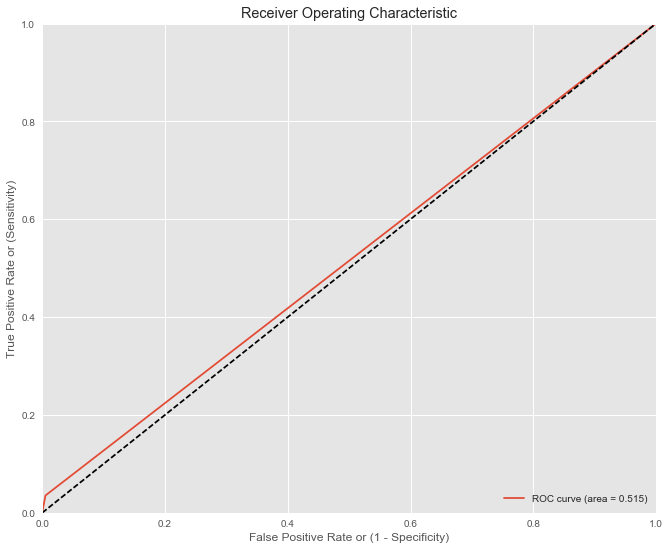

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=[11,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [45]:
clf3 = svm.SVC(C=1, kernel='rbf', probability=True)
clf3.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
y_preds3 = clf3.predict(X_test)
a = metrics.accuracy_score(y_test, y_preds3)
print "Accuracy on Test Set:\t\t{:0.3} ± {:0.3}".format(a.mean().round(3), 
                                                       a.std().round(3))
# cm = confusion_matrix(y_test, predictions_cv)
print '\nConfusion Matrix:'
conmat = np.array(confusion_matrix(y_test, y_preds3, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['Actual 1', 'Actual 0'],
                     columns=['Predicted 1','Predicted 0'])
print(confusion),'\n'
print "\nClassification Report:"
print classification_report(y_test, y_preds3)

Accuracy on Test Set:		0.947 ± 0.0

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1            0          170
Actual 0            0         3065 


Classification Report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3065
          1       0.00      0.00      0.00       170

avg / total       0.90      0.95      0.92      3235



/Users/michaelsanders/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
